# Multilayer Perceptron

# Fashion-MNIST Data Set

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

---

<p align="center">
    <img src="Fashion_MNIST.png" width="500">
</p>

---


# Data Set Details

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
- This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. 
- The first column consists of the class labels (see above), and represents the article of clothing. 
- The rest of the columns contain the pixel-values of the associated image.

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)


# Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## Steps to build a Multilayer Perceptron model

1. Importing the dataset
2. Splitting the test and train sets
3. Data Exploration
4. Data Preprocessing
5. Build the Model
6. Compile the Model
7. Model Training
8. Predicting & Visualizing the test results

## Importing Packages/Libraries

In [40]:
#pip install tensorflow

In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Importing/Loading Dataset & Train/Test Split

- Fashion MNIST dataset is being used in this Multlayer Perceptron Model. 
- Use the keras module to import the necessary data 
- We can load this dataset with the tensorflow.keras package. Load this data by running the following code.

In [42]:
fashion = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion.load_data()


Fashion_MNIST class names are not included with the dataset as we already know it ranges from 0  to 9. It is a good idea to create the class names now to plot the images later. 

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
class_names[y_train[0]]


'Ankle boot'

# Data Exploration

The following below cell shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

In [45]:
print(f"Train Images Shape: {X_train.shape}")
print(f"Train Labels Shape: {y_train.shape}\n")
print(f"Test Images Shape: {X_test.shape}")
print(f"Test Labels Shape: {y_test.shape}\n")
print(f"Train Labels: {y_train}\n")
print(f"Train Images[0] = {X_train[0]}")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)

Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)

Train Labels: [9 0 0 ... 3 0 5]

Train Images[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]


# Data pre-processing

The data must be preprocessed before training the network. We can check the first image in the training set, the pixel values fall in the range of 0 to 255.


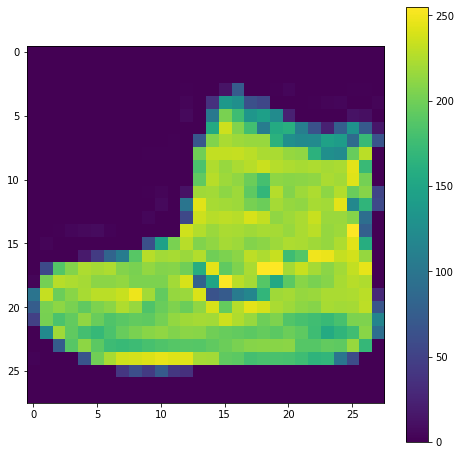

In [46]:
#As we already know that the first image is Ankle boot. This cell will show what first image is in the training set.
plt.figure(figsize=(8,8))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

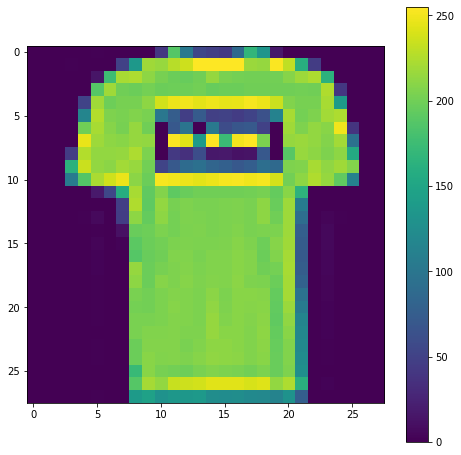

In [47]:
#As we already know that the second image is T-shirt/top. This cell will show what second image is in the training set.
plt.figure(figsize=(8,8))
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

It is important to scale these values to a range of 0 to 1 before feeding them to the neural network model. It is necessary to divide the values by 255. Both training set and the testing set be preprocessed in the same way.

In [48]:
X_train = X_train / 255.0
X_test = X_test /255.0

To check if the data is correct and it is ready to build and train the network, the below cell will show the first 15 images from the training set and display the class name below each image.

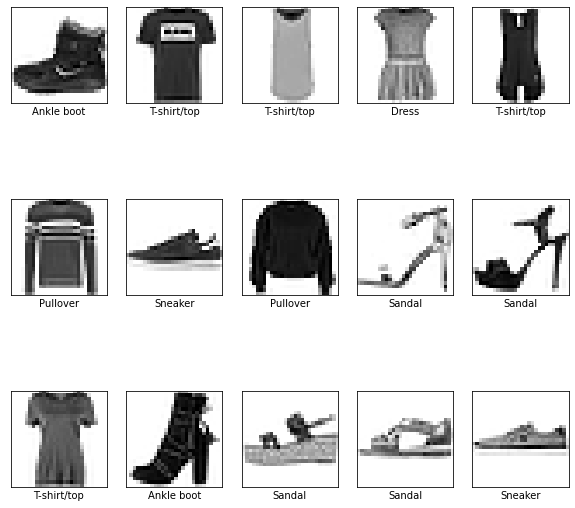

In [49]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Build the Model

To build the neural network, it requires the layers configuration of the model.
In the below cell, setting up the layers for the neural network. 
Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.
- The first line will create a Sequential model and is the simplest kind of Keras model for neural networks. The layers are as follows:
- The first layer tf.keras.layers.Flatten will transforms the format of the images from a 2D array-(of 28 by 28 pixels) to a 1D array(of 28* 28 = 784 pixels). This layer will unstacks the rows of pixels in the image and lines them up.
- Second Layer to fourth layer are a sequence of Dense layers with 200, 200, and 10 neurons, respectively.
- Second layer with 200 neurons will use the ReLU activation function.
- Third layer with 200 neurons will use the ReLU activation function.
- Fourth layer with 10 neurons, represents the 10 classes will use the softmax activation function.

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(200, activation = 'relu'))
model.add(tf.keras.layers.Dense(200, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

It is a good idea to see the model summary by using summary() function. It will show the neural network information.

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

The next step is to compile the model. We will use the compile() method to compile our model. The parameters are loss function, optimizer, and metrics. 
For loss function it will measure how accurate the model is during training. Optimizer will update the model after checking the data and it's loss function. The metrics is to monitor the training and testing steps. 

In [52]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Training

Training the neural network model requires the following steps:

- Feed the training data to the model. In this example, the training data is in the X_train and y_train arrays.
- The model learns to associate images and labels.
Our model is now ready for training. This requires us to feed the training data X_train and y_train into the model by using model.fit() method where it learns to associate images and labels. Also, need to setup the epochs in the model.fit() method.


In [53]:
model.fit(X_train,
          y_train,
          epochs=20)

Epoch 1/20
   1/1875 [..............................] - ETA: 4:59 - loss: 2.3240 - accuracy: 0.1562

c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 2s 1ms/step - loss: 0.7074 - accuracy: 0.7663
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4851 - accuracy: 0.8304
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4411 - accuracy: 0.8464
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4123 - accuracy: 0.8555
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3932 - accuracy: 0.8619
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3775 - accuracy: 0.8671
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3638 - accuracy: 0.8707
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3535 - accuracy: 0.8740
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3414 - accuracy: 0.8786
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3329 - accurac

The model is trained, as the model trains, keras displays the loss and accuracy metrics on each epoch iteration. The model reaches an accuracy of about 90% on the training data.

# Predicting & Visualizing the test results

After checking model's accuracy, now its time to evaluate it on the test set to estimate the generalization error. For the evaluation we will use the evaluate() method.

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"\nTest Accuracy: {np.round(test_acc * 100,2) }%")

313/313 [==============================] - 0s 907us/step - loss: 0.3445 - accuracy: 0.8764

Test Accuracy: 87.64%


The accuracy on the test dataset is less than the accuracy on the training dataset, it shows overfitting. The reason if overfitting is when a machine learning model performs little worse on the new dataset.

- The model make predictions about a test set, the X_test array.
- Verify that the predictions match the labels from the y_test array.
- The model's predict() method to make predictions on new instances.

In [64]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

With the model trained, we can make predictions about some images. The model’s linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

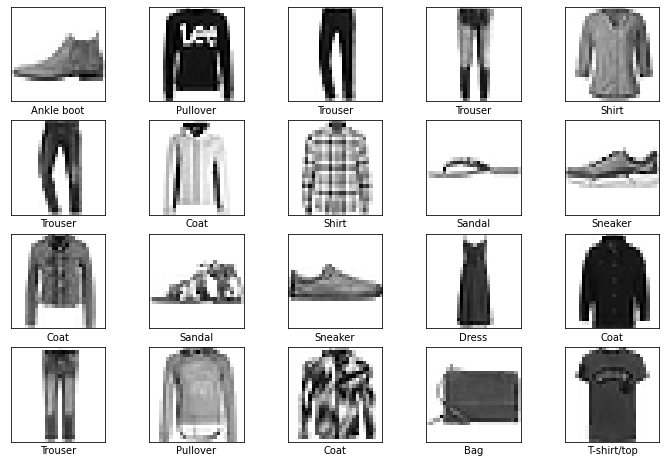

In [65]:
plt.figure(figsize=(12,8))
for _ in range(20):
    plt.subplot(4, 5, _+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[_], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[_]])
plt.show()

I will check if the model predicts the first image is ankle boot correctly or not.

In [66]:
predictions[0]

array([0.08574481, 0.0857444 , 0.0857452 , 0.08574465, 0.08574474,
       0.08694637, 0.08574598, 0.0874128 , 0.08576103, 0.22541004],
      dtype=float32)

In [67]:
np.argmax(predictions[0])

9

In [68]:
y_test[0]

9

As we can see that the model predicts the ankle boot correctly as our first image is ankle boot.

Now, checking on third image in our test data set.

In [69]:
predictions[2]

array([0.08533727, 0.23196785, 0.08533684, 0.08533696, 0.08533689,
       0.08533683, 0.08533683, 0.08533683, 0.08533683, 0.08533683],
      dtype=float32)

In [70]:
np.argmax(predictions[2])

1

In [71]:
y_test[2]

1

We can see that it predicts the image correctly, the third image is Trouser. 